In [1]:
import pandas as pd
import os 
import tarfile 
import urllib
import numpy as np
 
    
HOUSING_PATH = "C:\margo\ML\Geron\git_example\handson-ml2\datasets\housing"
    
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv")     
    return pd.read_csv(csv_path)

In [2]:
housing = load_housing_data(HOUSING_PATH)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

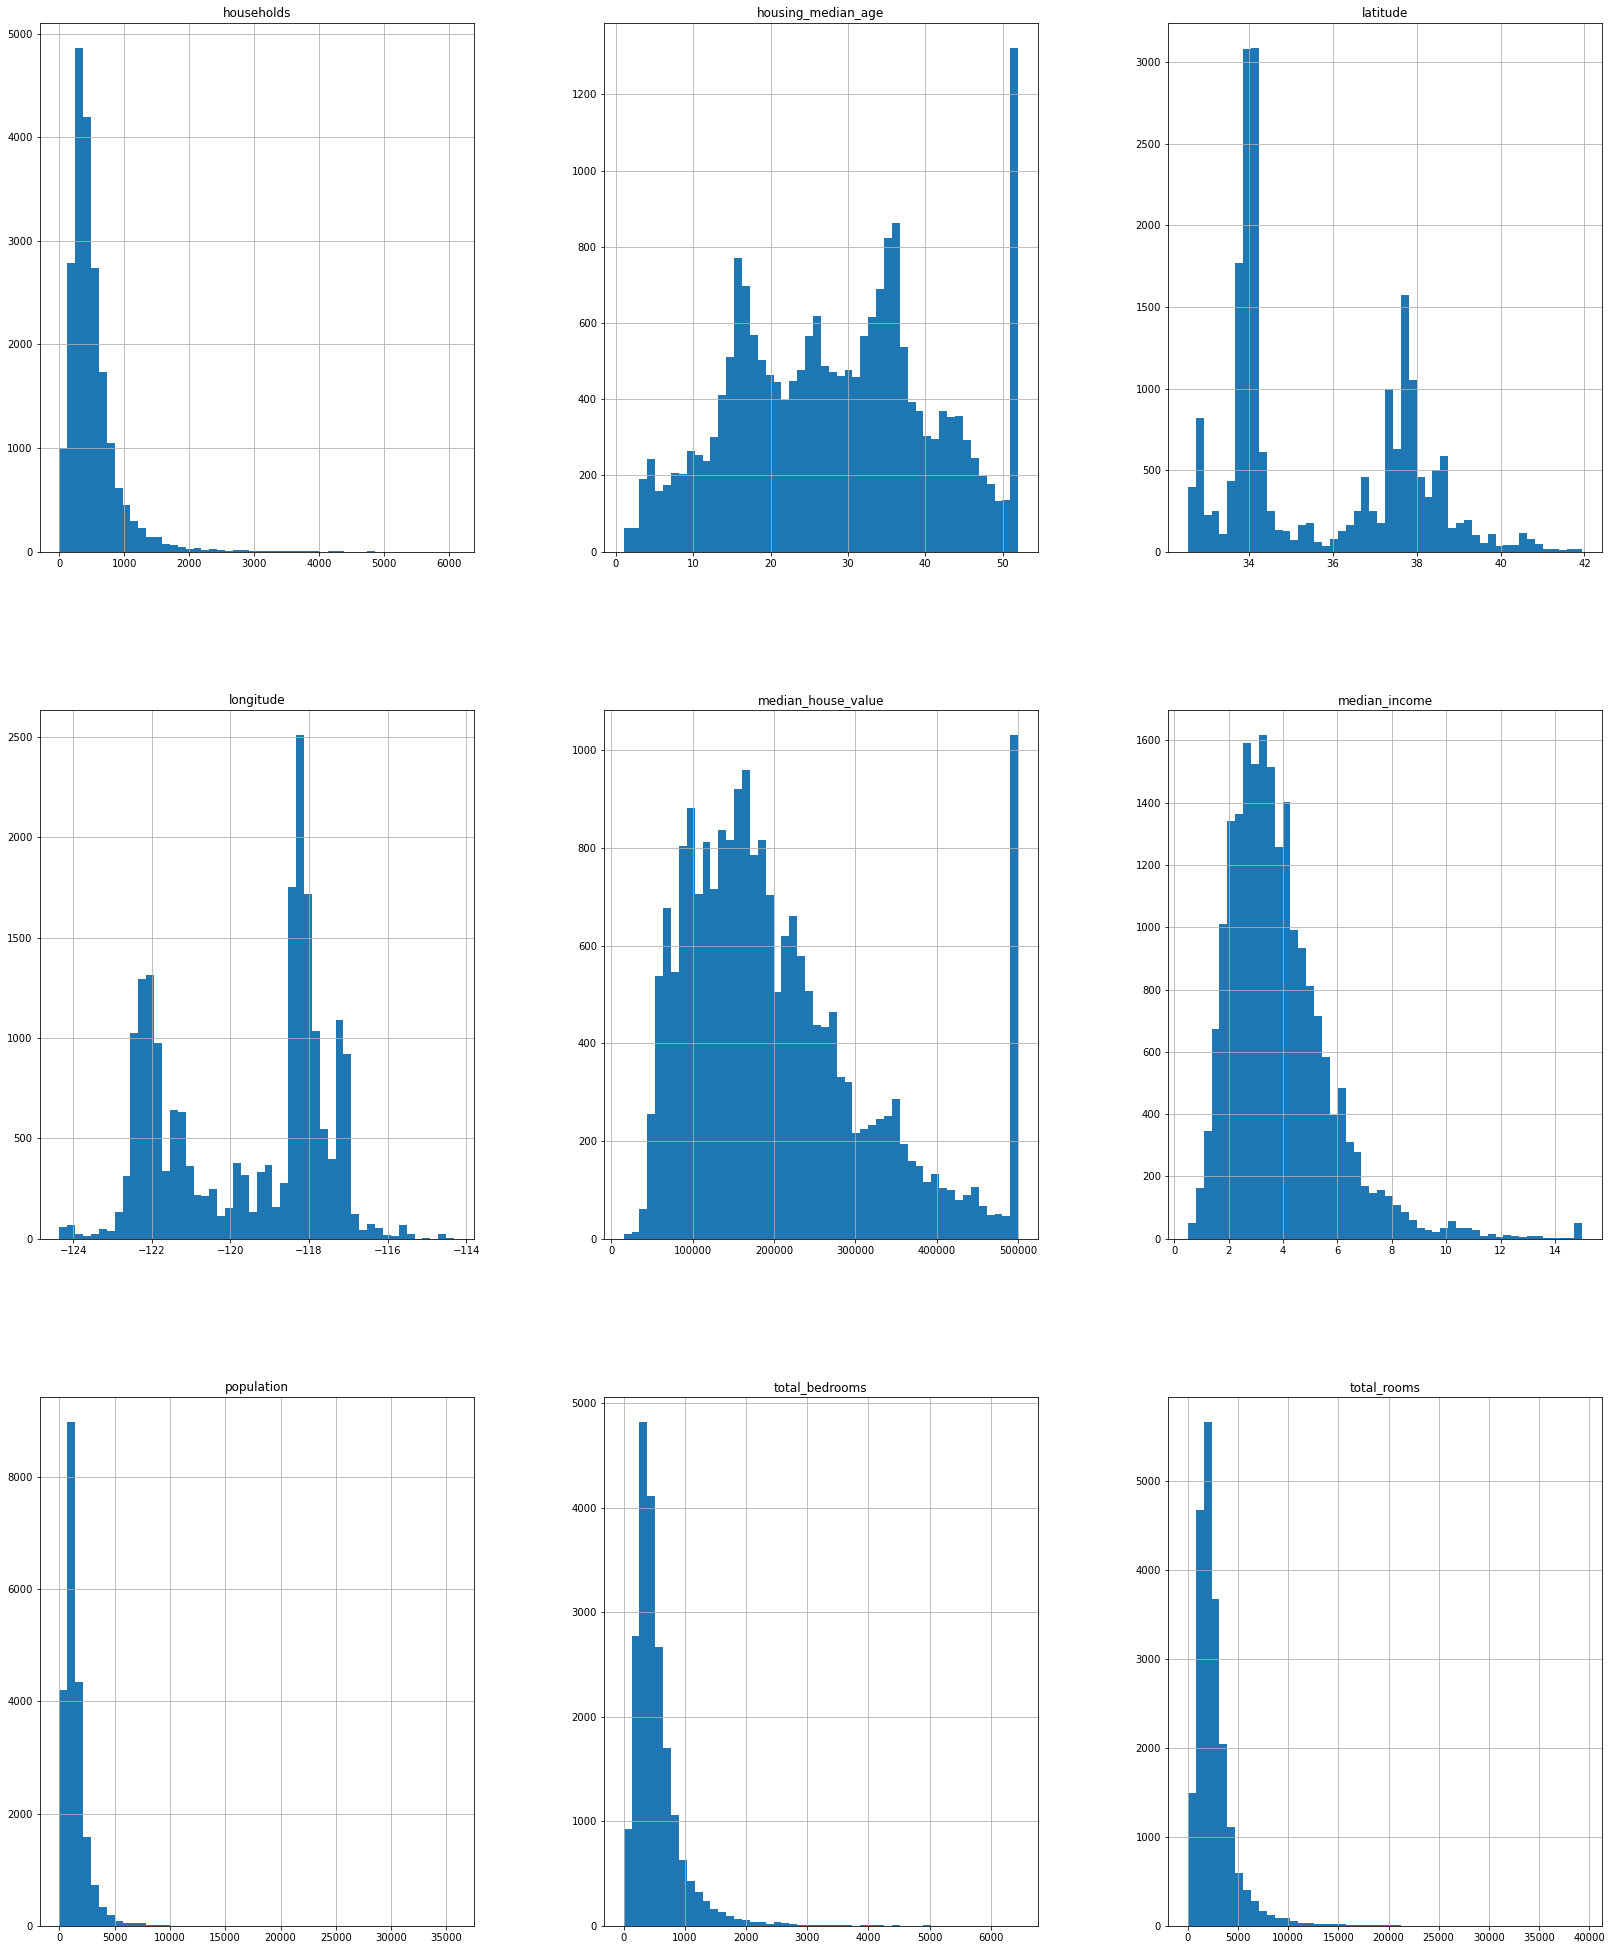

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(28,35))
plt.show()

In [8]:
def split_train_set(data, test_ratio):
        shuffled_indices = np.random.permutation(len(data))
        test_set_size = int(len(data) * test_ratio)
        test_indices = shuffled_indices[:test_set_size]
        train_indices = shuffled_indices[test_set_size:]     
        return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_set(housing, 0.2)

In [10]:
print("train set lenght is:" + str(len(train_set)) + ";\ntest set lenght is: " +str(len(test_set)))

train set lenght is:16512;
test set lenght is: 4128


In [11]:
from zlib import crc32


def test_set_check(identifier, test_ratio):     
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))     
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index()   
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

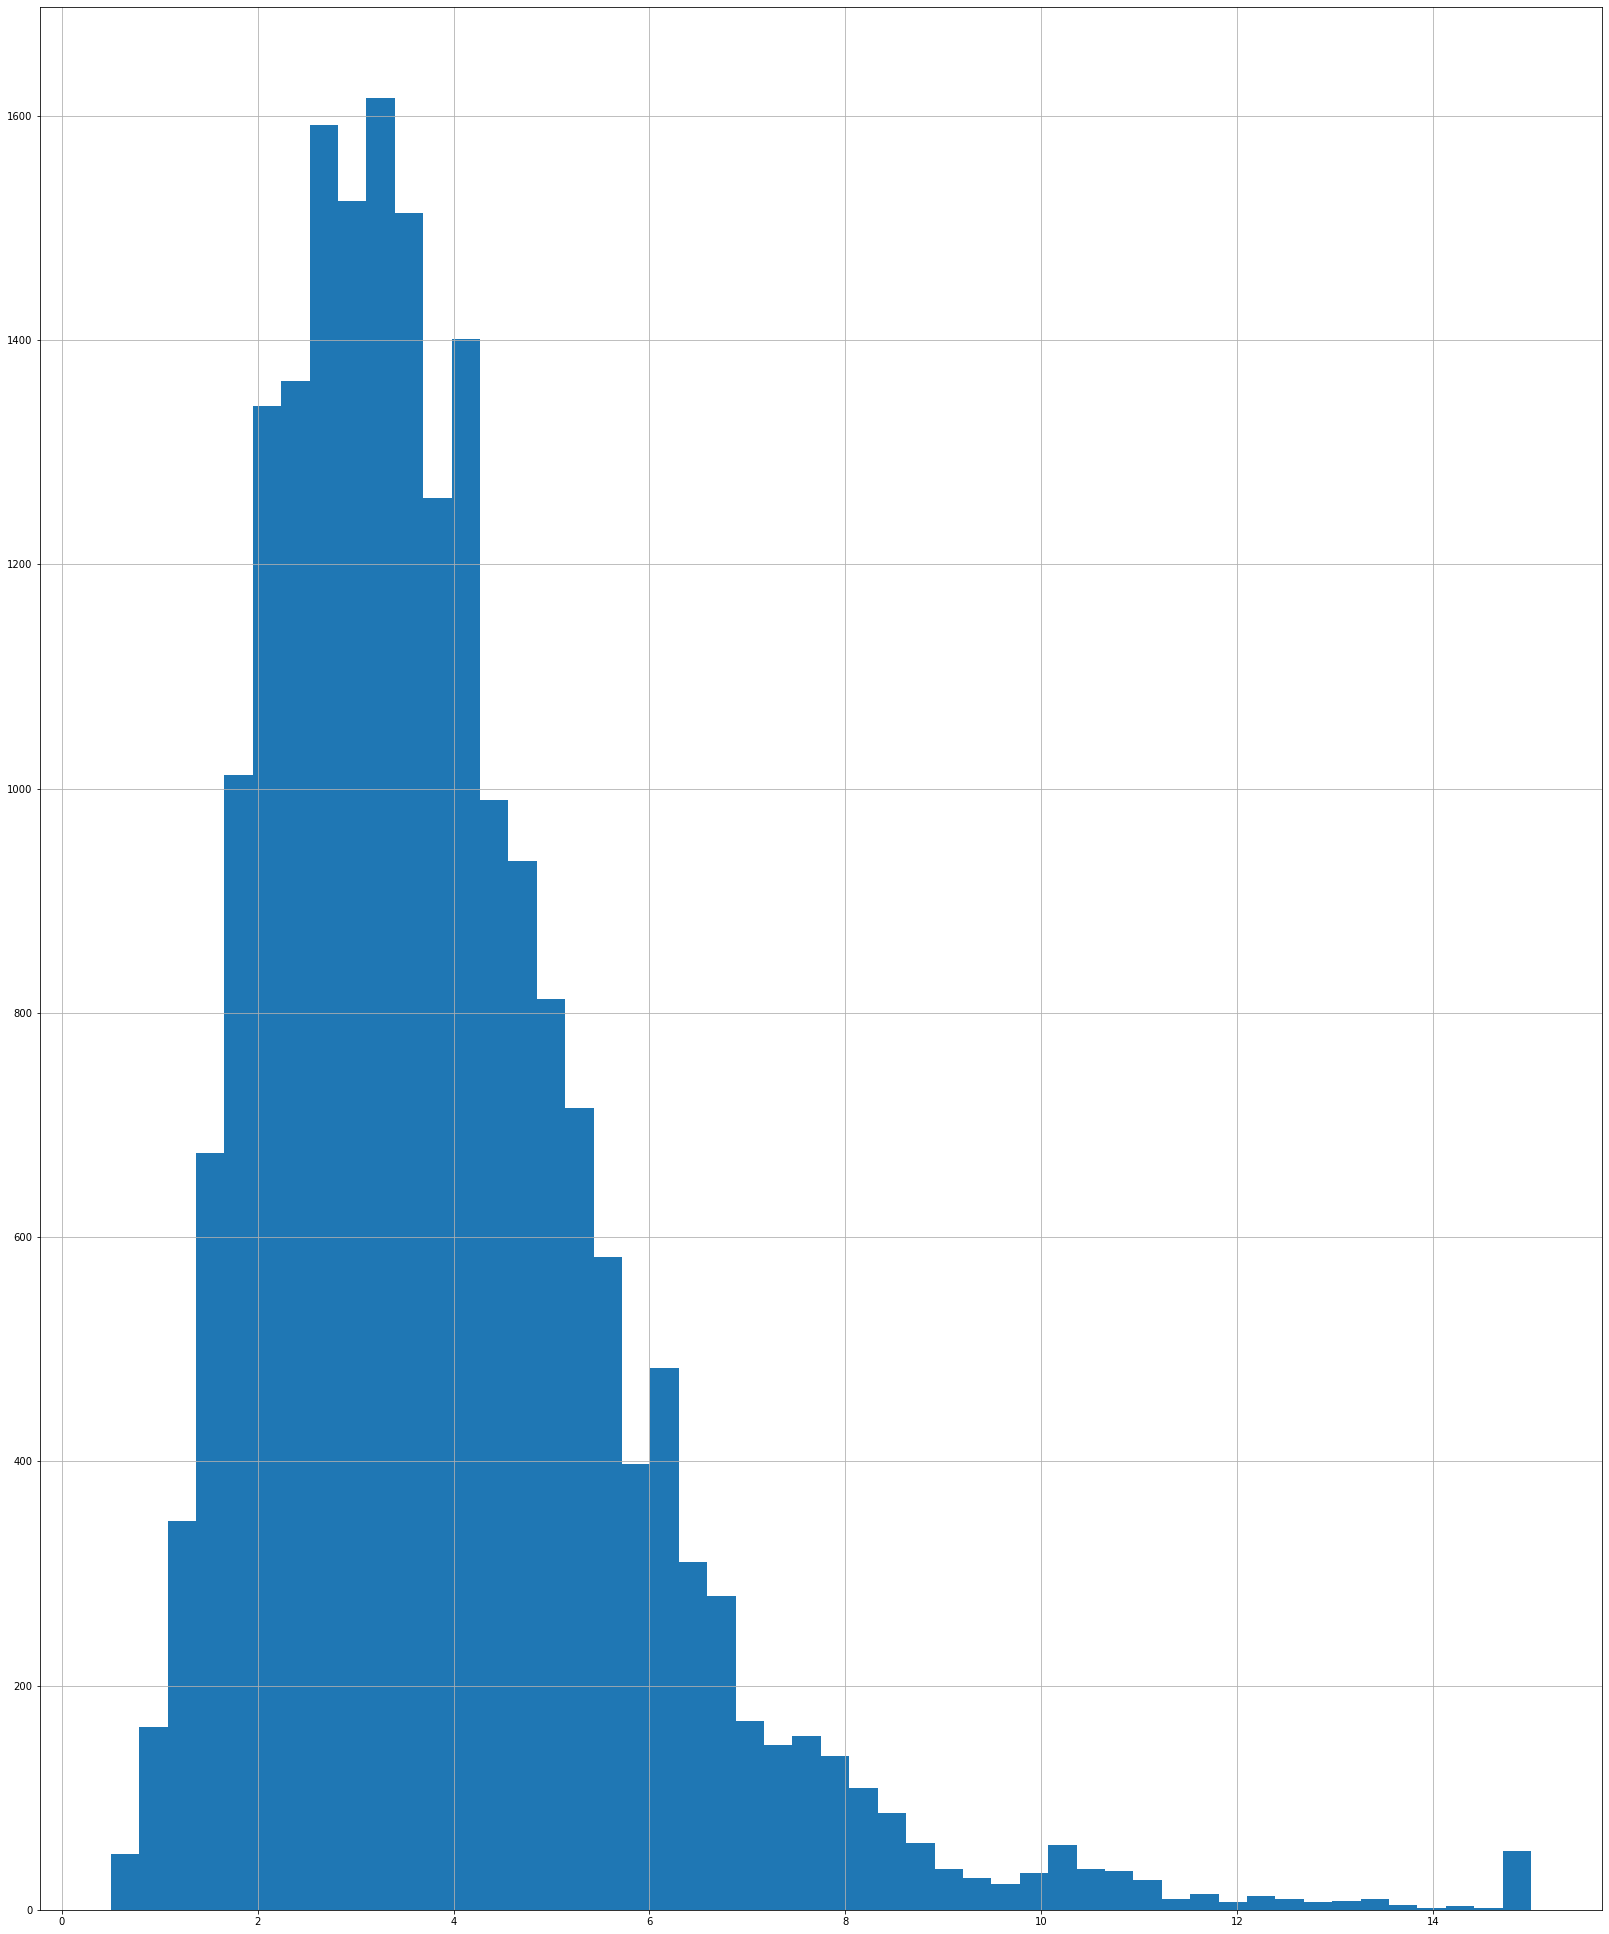

In [13]:
housing["median_income"].hist(bins=50, figsize=(28,35))

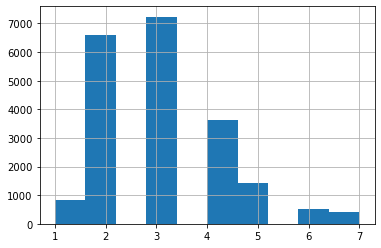

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, 7.5, 9.0, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])
housing["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit 
 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):     
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          6  
1          6  
2          5  
3          4  
4          3

In [17]:
for set_ in (strat_train_set, strat_test_set):     
    set_.drop("income_cat", axis=1, inplace=True)

In [18]:
housing = strat_train_set.copy()

In [19]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"] 
housing["population_per_household"]=housing["population"] / housing["households"]

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [21]:
from sklearn.impute import SimpleImputer 

housing_num = housing.drop("ocean_proximity", axis=1)
#imputer = SimpleImputer(strategy="median")
#imputer.fit(housing_num)

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin 
 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 

In [23]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):     
    def __init__(self, add_bedrooms_per_room = True): # no * args or ** kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room     
    def fit(self, X, y=None):         
        return self  # n o t h i n g e l s e t o d o
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:             
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room] 
 
        else:             
            return np.c_[X, rooms_per_household, population_per_household] 


In [24]:
#attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#housing_extra_attribs = attr_adder.transform(housing.values)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
 
num_pipeline = Pipeline([         
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()), 
        ('std_scaler', StandardScaler()),     
    ]) 
 
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [26]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
    
num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"] 
 
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),     
    ]) 
 
housing_prepared = full_pipeline.fit_transform(housing)

In [27]:
from sklearn.linear_model import LinearRegression 
 
lin_reg = LinearRegression() 
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [28]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) 
print("Predictions:", lin_reg.predict(some_data_prepared)) 

Predictions: [ 85567.3451932  471965.3878167  151916.14768674 186477.93483214
 244358.19381986]


In [33]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared) 
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

68618.91698891252

In [34]:
from sklearn.tree import DecisionTreeRegressor 
 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

#Now that the model is trained, letâ€™s evaluate it on the training set:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions) 
tree_rmse = np.sqrt(tree_mse) 
tree_rmse

0.0